In [1]:
import time

import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import skimage as sk
from skimage import transform
from skimage import util
import random

In [3]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [4]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 25

In [5]:
afine_tf = transform.AffineTransform(shear=0.2)
aug_test_im = []
aug_test_labels = []
aug_digi_im = []
aug_digi_labels = []
aug_train_im = []
aug_train_labels = []
for i in range(60000):
    image = train_images[i]
    label = train_labels[i]
    random_degree = random.uniform(-1, 1)
    temp1 = sk.transform.rotate(image, random_degree)
    temp2 = transform.warp(image, inverse_map=afine_tf)
    temp3 = transform.warp(temp1, inverse_map=afine_tf)
    aug_train_im.append(image)
    aug_train_im.append(temp2)
    aug_train_im.append(temp1)
    aug_train_im.append(temp3)
    aug_train_labels.append(label)
    aug_train_labels.append(label)
    aug_train_labels.append(label)
    aug_train_labels.append(label)
for i in range(10000):
    image = test_images[i]
    label = test_labels[i]
    random_degree = random.uniform(-1, 1)
    temp1 = sk.transform.rotate(image, random_degree)
    temp2 = transform.warp(image, inverse_map=afine_tf)
    temp3 = transform.warp(temp1, inverse_map=afine_tf)
    aug_test_im.append(image)
    aug_test_im.append(temp1)
    aug_test_im.append(temp2)
    aug_test_im.append(temp3)
    aug_test_labels.append(label)
    aug_test_labels.append(label)
    aug_test_labels.append(label)
    aug_test_labels.append(label)
for i in range(10240):
    image = digi_images[i]
    label = digi_labels[i]
    random_degree = random.uniform(-1, 1)
    temp1 = sk.transform.rotate(image, random_degree)
    temp2 = transform.warp(image, inverse_map=afine_tf)
    temp3 = transform.warp(temp1, inverse_map=afine_tf)
    aug_digi_im.append(image)
    aug_digi_im.append(temp1)
    aug_digi_im.append(temp2)
    aug_digi_im.append(temp3)
    aug_digi_labels.append(label)
    aug_digi_labels.append(label)
    aug_digi_labels.append(label)
    aug_digi_labels.append(label)

In [6]:
aug_test_im = np.array(aug_test_im, dtype = np.uint8)
test_labels = np.array(aug_test_labels)
aug_digi_im = np.array(aug_digi_im, dtype = np.uint8)
digi_labels = np.array(aug_digi_labels)
aug_train_im = np.array(aug_train_im, dtype = np.uint8)
train_labels = np.array(aug_train_labels)

In [7]:
x_train = np.expand_dims(aug_train_im, axis=-1)
x_test = np.expand_dims(aug_test_im, axis=-1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

x_digi_test = np.expand_dims(aug_digi_im, axis=-1)
y_digi_test = keras.utils.to_categorical(digi_labels)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
        )

Epoch 1/25
240000/240000 [==============================] - 33s 137us/sample - loss: 1.6475 - acc: 0.4025
Epoch 2/25
240000/240000 [==============================] - 39s 163us/sample - loss: 1.4198 - acc: 0.4697
Epoch 3/25
240000/240000 [==============================] - 42s 174us/sample - loss: 1.3939 - acc: 0.4788
Epoch 4/25
240000/240000 [==============================] - 45s 187us/sample - loss: 1.3810 - acc: 0.4832
Epoch 5/25
240000/240000 [==============================] - 43s 181us/sample - loss: 1.3736 - acc: 0.4852
Epoch 6/25
240000/240000 [==============================] - 45s 188us/sample - loss: 1.3684 - acc: 0.4870
Epoch 7/25
240000/240000 [==============================] - 46s 190us/sample - loss: 1.3642 - acc: 0.4880
Epoch 8/25
240000/240000 [==============================] - 51s 211us/sample - loss: 1.3606 - acc: 0.4897
Epoch 9/25
240000/240000 [==============================] - 61s 254us/sample - loss: 1.3597 - acc: 0.4903
Epoch 10/25
240000/240000 [===================

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(y_test_pred, axis=1)
report = classification_report(test_labels, predicted, digits = 4)
confusion_matrix = confusion_matrix(y_true=test_labels, y_pred=predicted)
print(report)
print(confusion_matrix)

40000/40000 [==============================] - 5s 127us/sample
              precision    recall  f1-score   support

           0     0.7240    0.3693    0.4891      4000
           1     0.7321    0.3683    0.4900      4000
           2     0.8681    0.4740    0.6132      4000
           3     0.8178    0.3130    0.4527      4000
           4     0.7536    0.3302    0.4592      4000
           5     0.1592    0.8912    0.2702      4000
           6     0.7604    0.4285    0.5481      4000
           7     0.7705    0.3500    0.4813      4000
           8     0.7626    0.4265    0.5471      4000
           9     0.8357    0.3725    0.5153      4000

    accuracy                         0.4323     40000
   macro avg     0.7184    0.4323    0.4866     40000
weighted avg     0.7184    0.4324    0.4866     40000

[[1477  263   20   24   18 1978   12   61  119   28]
 [ 113 1473   31   17   15 2229   13   18   55   36]
 [  31   20 1896   49   22 1785   94   38   28   37]
 [  69   41   15 12

In [11]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(confusion_matrix, y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix#confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes#[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[1477  263   20   24   18 1978   12   61  119   28]
 [ 113 1473   31   17   15 2229   13   18   55   36]
 [  31   20 1896   49   22 1785   94   38   28   37]
 [  69   41   15 1252   95 2333   74   88   12   21]
 [  37   43    8   52 1321 2395   26   19   74   25]
 [  15   33   48   28  186 3565   22   16   62   25]
 [   9   12  107   53   25 1914 1714  132    9   25]
 [ 108   36   18   48    6 2095  232 1400   51    6]
 [ 111   31   18    1   34 1930   40   39 1706   90]
 [  70   60   23    7   31 2165   27    6  121 1490]]


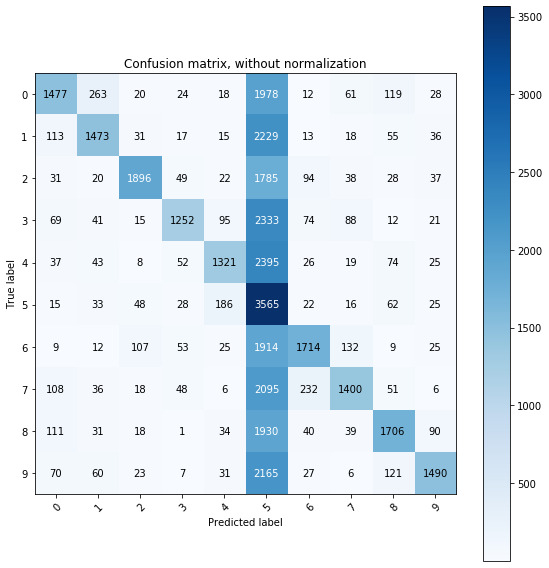

In [12]:
plot_confusion_matrix(confusion_matrix,y_true=test_labels, y_pred=predicted, classes=['0','1','2','3','4','5','6','7','8','9'],
                      title='Confusion matrix, without normalization')

In [13]:
predicted

array([0, 0, 0, ..., 5, 5, 5])

40960/40960 [==============================] - 2s 52us/sample
              precision    recall  f1-score   support

           0     0.6968    0.3052    0.4244      4096
           1     0.5976    0.4485    0.5124      4096
           2     0.5314    0.4941    0.5121      4096
           3     0.7108    0.3318    0.4524      4096
           4     0.5627    0.3613    0.4401      4096
           5     0.1806    0.7366    0.2900      4096
           6     0.4318    0.3091    0.3603      4096
           7     0.6694    0.3025    0.4167      4096
           8     0.3933    0.3345    0.3615      4096
           9     0.5145    0.3474    0.4147      4096

    accuracy                         0.3971     40960
   macro avg     0.5289    0.3971    0.4185     40960
weighted avg     0.5289    0.3971    0.4185     40960

Confusion matrix, without normalization
[[1250  467  181   30   48  868  182  101  602  367]
 [ 224 1837  242   24   21 1341   46   58  187  116]
 [  35   76 2024   29   75 1604  

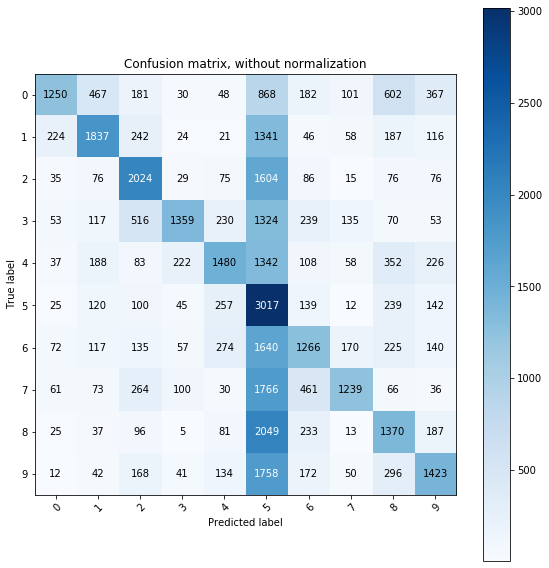

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_digi_pred = model.predict(x_digi_test, batch_size=32, verbose=1)
predicted = np.argmax(y_digi_pred, axis=1)
report = classification_report(digi_labels, predicted, digits = 4)
confusion_matrix = confusion_matrix(y_true=digi_labels, y_pred=predicted)
print(report)
plot_confusion_matrix(confusion_matrix,y_true=digi_labels, y_pred=predicted, classes=['0','1','2','3','4','5','6','7','8','9'],
                      title='Confusion matrix, without normalization')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted, digits = 4)
confusion_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted)
print(report)
print(confusion_matrix)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(x_digi_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_digi_test, axis=1), predicted, digits = 4)
confusion_matrix = confusion_matrix(y_true=np.argmax(y_digi_test, axis=1), y_pred=np.argmax(pred, axis=1))
print(report)
print(confusion_matrix)

In [ ]:
#plot_cm(np.argmax(y_digi_test, axis=1), np.argmax(pred, axis=1))

In [ ]:
print(model.summary())

from sklearn.metrics import confusion_matrix

pred = model.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
confusion_matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted)

In [ ]:
print(confusion_matrix)